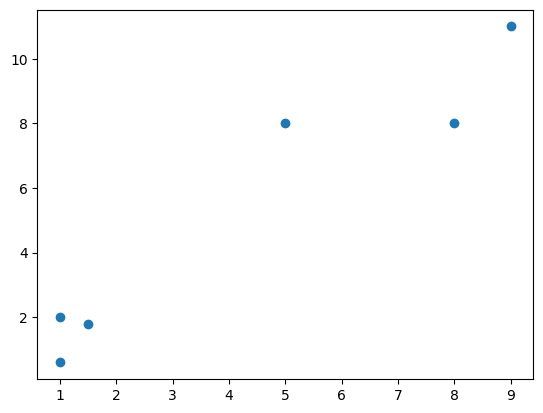

In [452]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])
plt.scatter(x[:,0],x[:,1])
plt.show()

In [453]:
def cost(k,clusters,medoids):
    cost = 0
    for i in range(k):
        clus_cost = 0
        for j in clusters[i]:
            clus_cost += np.absolute(j-medoids[i]).sum()
        cost += clus_cost
    return cost

In [454]:
def makecluster(k,data,medoids):
    clusters = []
    for j in range(k):
        clusters.append([])
    for point in data:
        distances = [np.absolute(point-m).sum() for m in medoids]
        min_distance = min(distances)
        l = distances.index(min_distance)
        clusters[l].append(point)
    return clusters

In [467]:
def fit(data, k=2,max_iterations=100):
    # Initialize medoids randomly
    medoids = []
    for i in range(k):
        medoids.append(data[i])
    
    for _ in range(max_iterations):
        # Assign points to clusters
        clusters = makecluster(k, data, medoids)

        
        # Calculate the cost
        old_cost = cost(k, clusters, medoids)

        
        # Update medoids
        new_medoids = []
        for i in medoids:
            new_medoids.append(i)

        temp = 0

        for i in range(k):
            temp = temp + 1
            print("call outer loop", temp)
            cluster_points = clusters[i]
            min_cost = float('inf')
            new_medoid = medoids[i]
            for point in cluster_points:
                temp_med = [point if j == i else medoids[j] for j in range(k)]
                print("The temp med is - ",temp_med)
                new_cost = cost(k, clusters,temp_med)
                if new_cost < min_cost:
                    min_cost = new_cost
                    new_medoid = point
            medoids[i] = new_medoid
        
        # Re-assign points to clusters with updated medoids
        clusters = makecluster(k, data, medoids)
        
        # Calculate new cost
        new_cost = cost(k, clusters, medoids)
        
        # If there's no significant change in cost, break
        if np.abs(old_cost - new_cost) < 1e-5:
            break
    
    return medoids

In [468]:
def predict(data,medoids):
    predictions = []
    for point in data:
        distances = [np.absolute(point-m).sum() for m in medoids]
        min_distance = min(distances)
        l = distances.index(min_distance)
        predictions.append(l)
    return predictions

In [469]:
medoids = fit(x)
medoids = np.array(medoids)
medoids

call outer loop 1
The temp med is -  [array([1., 2.]), array([1.5, 1.8])]
The temp med is -  [array([1. , 0.6]), array([1.5, 1.8])]
call outer loop 2
The temp med is -  [array([1., 2.]), array([1.5, 1.8])]
The temp med is -  [array([1., 2.]), array([5., 8.])]
The temp med is -  [array([1., 2.]), array([8., 8.])]
The temp med is -  [array([1., 2.]), array([ 9., 11.])]
call outer loop 1
The temp med is -  [array([1., 2.]), array([5., 8.])]
The temp med is -  [array([1.5, 1.8]), array([5., 8.])]
The temp med is -  [array([1. , 0.6]), array([5., 8.])]
call outer loop 2
The temp med is -  [array([1., 2.]), array([5., 8.])]
The temp med is -  [array([1., 2.]), array([8., 8.])]
The temp med is -  [array([1., 2.]), array([ 9., 11.])]
call outer loop 1
The temp med is -  [array([1., 2.]), array([8., 8.])]
The temp med is -  [array([1.5, 1.8]), array([8., 8.])]
The temp med is -  [array([1. , 0.6]), array([8., 8.])]
call outer loop 2
The temp med is -  [array([1., 2.]), array([5., 8.])]
The temp

array([[1., 2.],
       [8., 8.]])

In [458]:
y_out = predict(x,medoids)
y_out

[0, 0, 1, 1, 0, 1]

<function matplotlib.pyplot.show(close=None, block=None)>

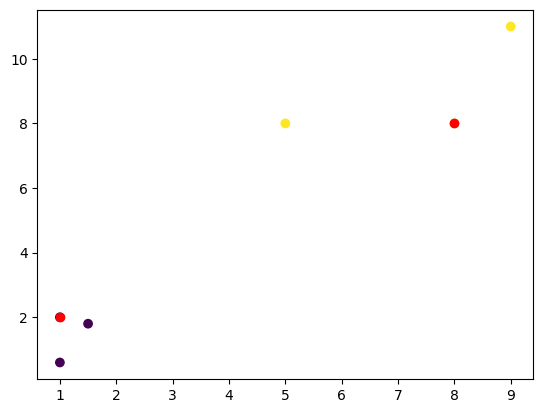

In [459]:
plt.scatter(x[:,0],x[:,1],c=y_out)
plt.scatter(medoids[:,0],medoids[:,1],c='red')
plt.show